# Lesson 2

## Single node ANN

Goal is to train a single node with TensorFlow.

Goal is to set up an ANN with one layer and a single node to learn the formula: **y = 2x - 1**.

Example is a **regression** ANN. That means the network is trained to predict continuous numerical values instead of categories or classes.

We will also use the correct terminology such as **features** (inputs) and **labels** (outputs).

This is a type of **supervised learning**, because both the features and labels are known during training.

In [1]:
import sys
import platform
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-10-11 12:38:30.578901: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-11 12:38:30.620708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-11 12:38:31.867119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Initial dataset

Preparing labeled data.

Where:

* x – the input **features**; the values that the model takes to make predictions.
* y – the target **labels**; the values that the model is trying to predict.

In [2]:
x = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype=float)
y = 2 * x - 1

In [3]:
y

array([-7., -5., -3., -1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.,
       19., 21., 23.])

## ANN architecture

Preparing ANN architecture.

In [4]:
layer = Dense(units=1, name='output_layer', activation='linear')

model = Sequential([
    Input(shape=(1,), name='input_layer'),
    layer
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

2025-10-11 12:38:33.248864: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


* Dense – a layer where “dense” means fully connected; each neuron receives input from every neuron in the previous layer.
* Sequential – a type of ANN where layers are arranged one after another in sequence.
* sgd – Stochastic Gradient Descent, an optimizer that updates weights to reduce error.
* mean_squared_error – a loss function that measures the average squared difference between predicted and actual values.

## Preparing ANN training data set

Spliting data to training, validation and test set.

In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.4, random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

print("DATASET STRUCTURE")
print(f"Training features (x):  {x_train}")
print(f"Training labels (y):    {y_train}")
print(f"Validation features (x):{x_val}")
print(f"Validation labels (y):  {y_val}")
print(f"Test features (x):      {x_test}")
print(f"Test labels (y):        {y_test}")

DATASET STRUCTURE
Training features (x):  [ 6. -1. 12.  1.  4.  7.  9.  0.  3.]
Training labels (y):    [11. -3. 23.  1.  7. 13. 17. -1.  5.]
Validation features (x):[10. 11.  5.]
Validation labels (y):  [19. 21.  9.]
Test features (x):      [-3. -2.  8.  2.]
Test labels (y):        [-7. -5. 15.  3.]


## Training 

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - loss: 206.1885 - mae: 11.2251 - val_loss: 27.9890 - val_mae: 4.9511
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.5460 - mae: 2.8342 - val_loss: 2.1387 - val_mae: 1.2517
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.3901 - mae: 1.0027 - val_loss: 0.3701 - val_mae: 0.5754
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.7364 - mae: 0.7252 - val_loss: 0.1994 - val_mae: 0.4417
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6873 - mae: 0.7059 - val_loss: 0.1711 - val_mae: 0.4070
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6732 - mae: 0.6995 - val_loss: 0.1630 - val_mae: 0.3960
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6613 - mae: 0.6933 - val_loss: 0.1590 - val_mae: 0.3908
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6497 - mae: 0.6872 - val_loss: 0.1560 - val_mae: 0.3869
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6384 -

## Model results

In [7]:
print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[18.996399]]


In [8]:
print("Here is what I learned: {}".format(layer.get_weights()))

Here is what I learned: [array([[1.998081]], dtype=float32), array([-0.9844114], dtype=float32)]


In [9]:
weights = layer.get_weights()
w_learned, b_learned = weights
weights

[array([[1.998081]], dtype=float32), array([-0.9844114], dtype=float32)]

## Predict on data

Using model.

Using initial data and produce predictions for it.

In [10]:
predictions = model.predict(x)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[-6.978654 ],
       [-4.980573 ],
       [-2.9824924],
       [-0.9844114],
       [ 1.0136695],
       [ 3.0117505],
       [ 5.0098314],
       [ 7.0079126],
       [ 9.005994 ],
       [11.004074 ],
       [13.002155 ],
       [15.0002365],
       [16.998318 ],
       [18.996399 ],
       [20.99448  ],
       [22.99256  ]], dtype=float32)

## Coparing against actual weight and bias

In [11]:
w_actual, b_actual = 2.0, -1.0
w_error = abs(w_actual - w_learned[0][0]) / w_actual * 100
b_error = abs(b_actual - b_learned[0]) / abs(b_actual) * 100
total_accuracy = 100 - (w_error + b_error) / 2

In [12]:
print("=== MODEL RESULTS ===")
print(f"Learned weight: {w_learned[0][0]:.6f} (real: 2.000000)")
print(f"Learned bias: {b_learned[0]:.6f} (real: -1.000000)")
print(f"Weight accuracy: {100 - w_error:.2f}%")
print(f"Bias accuracy: {100 - b_error:.2f}%")
print(f"Average accuracy: {total_accuracy:.2f}%")
print(f"Final loss: {history.history['loss'][-1]:.6f}")

=== MODEL RESULTS ===
Learned weight: 1.998081 (real: 2.000000)
Learned bias: -0.984411 (real: -1.000000)
Weight accuracy: 99.90%
Bias accuracy: 98.44%
Average accuracy: 99.17%
Final loss: 0.000110


## Save and load model

In [13]:
model.save('model.keras')

In [14]:
loaded_model = tf.keras.models.load_model('model.keras')

## Model visualization

Use [Netron app](https://netron.app/) to investigate created mode content.

## Finally

Investigate more values.

In [15]:
print("\n=== FINAL ESTIMATION TOP ON TEST DATA ===")
test_loss, test_mae = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Test data set loss: {test_loss:.6f}")
print(f"Test data average ... (MAE): {test_mae:.6f}")


=== FINAL ESTIMATION TOP ON TEST DATA ===
Test data set loss: 0.000243
Test data average ... (MAE): 0.013190


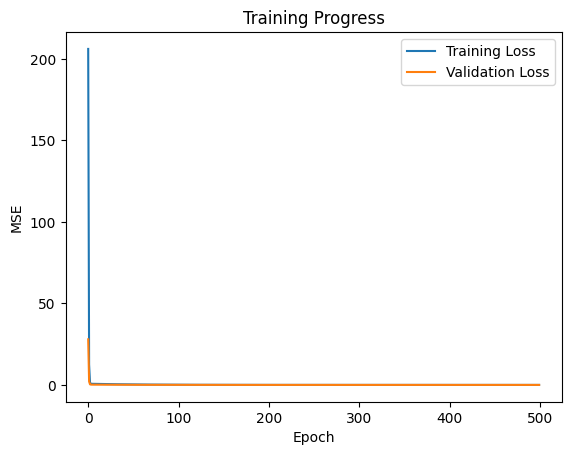

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training Progress')
plt.show()